### Настройка гугл диска для работы с данными

Скопируйте себе этот файл на гугл диск. Установите приложение colaboratory (https://medium.com/deep-learning-turkey/google-colab-free-gpu-tutorial-e113627b9f5d)

Далее выполните следующие инструкции

In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

Найдите ваши файлы на диске. Этот путь будет дальше использоваться (тут надо указать свой путь к файлам!)
загрузите в файл dinos.txt из репозитория: 

In [5]:
!ls "drive/Colab Notebooks/nlp-hse/classification"

classification.ipynb  data-train.txt


In [0]:
work_path = "drive/Colab Notebooks/nlp-hse/classification/"

In [0]:
!pip install fasttext

# Классификация текстов
Вам предстоит написать свой классификатор текстов.

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import KFold
import seaborn as sns
import string
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Читаем данные

In [13]:
data = pd.read_csv(work_path + 'data-train.txt', sep = '\t')
data.head()

,lang,text
0,ru,Притом же это республиканское устройство бурсы...
1,ru,"Ты упомянул о том, что могло бы привести меня ..."
2,uk,"«Отже йому і спиться, і байдуже — хропе собі!...."
3,pl,"Kiedy słońce, odchodząc za horyzont, poczęło w..."
4,ru,"Странник выудил их всех, всех до единого, и с ..."


In [0]:
data.dropna(inplace=True)

In [0]:
langs = np.unique(data.lang)

In [16]:
len(langs)

26

* Посмотрим на число примеров по классам в выборке.

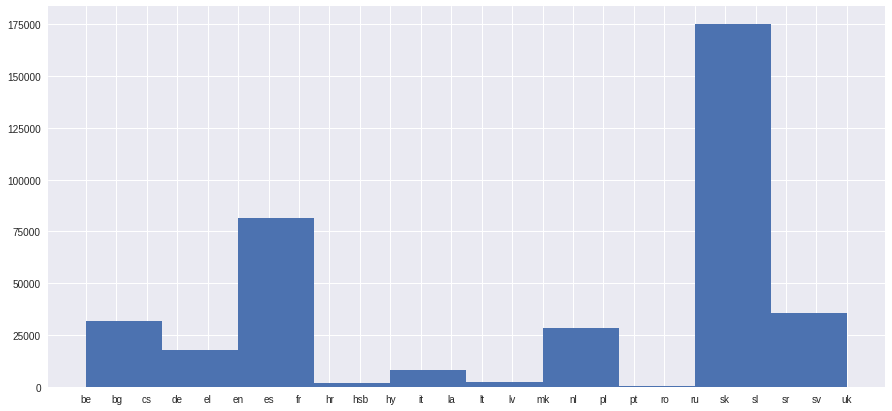

In [18]:
plt.figure(figsize=(15, 7))
data.lang.hist()

* Разобьем данные на обучающую и тестовую

In [0]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
train_index, test_index = next(sss.split(data.text, data.lang))
train_data = data.iloc[train_index]
test_data = data.iloc[test_index]

## Часть 1. Предварительная обработка данных и классификация на правилах

1. Протестируйте простой принцип классификации на правилах, например: 
    * Если в тексте встречается буква "э", то текст относится к классу "ru" (написан на русском, то есть)
    * Если в тексте встречается буква "ł", то текст относится к классу "pl" (написан на польском, то есть)
    * И любое другое правило, которое кажется вам разумным. 

In [0]:
class RuleClassifer(object):
    def __init__(self):
        <your code here>

    def fit(self, x_train, y_train):
        """
        Метод обучает модель. может ничего не делать. Все правила могут быть заданы в predict.
        
        Parameters
        ----------
        x_train : list of str
            Список обучающих текстов.
        
        y_train : list of str
            Список меток классов (языков в нашем случае) для x_train
            
            
        Returns
        -------
        self : object
            Returns self
        """
        <your code here>

        return self
    
    def predict(self, text):
        """
        Предсказывает метки классов (языки) для text по правилам.
        
        Parameters
        ----------
        text : list of str
            Список строк для которых необходимо предсказать язык.
        
        Returns
        -------
        predictions : list of str
            Возвращает список классов для text.
        """
        predictions = []
        <your code here>
        return predictions

    pass

* Какова точность, полнота, аккуратность при использовании этих правил?

In [0]:
rclf = RuleClassifer().fit(train_data.text, train_data.lang)
predictions = rclf.predict(test_data.text)

In [0]:
print("Precision: {0:6.5f}".format(precision_score(test_data.lang, predictions, average='macro')))
print("Recall: {0:6.5f}".format(recall_score(test_data.lang, predictions, average='macro')))
print("F1-measure: {0:6.5f}".format(f1_score(test_data.lang, predictions, average='macro')))
print("Accuracy: {0:6.2f}".format(accuracy_score(test_data.lang, predictions)))

2 . Определим сходство языков следующим образом: пусть $A_1$ и $A_2$ – множества символов из текстов на первом и втором языке соответственно (возможно, в этом случае разумно не исключать знаки пунктуации и учитывать регистр). Сходство языков измеряется по коэффициенту Жаккара: $\frac{A_1 \cap A_2}{A_1 \cup A_2}$. Постройте heatmap сходства языков. 

In [0]:
from nltk.metrics import jaccard_distance
from itertools import combinations

def get_map(<your code here>):
    <your code here>

In [0]:
hm = <your code here>

In [0]:
plt.figure(figsize=(20, 10))
sns.heatmap(
    data=np.array(hm.values, dtype=np.float64),
    
    annot=True,
    xticklabels=langs, yticklabels=langs)
plt.title("Jaccard langs index")
plt.show()

##  Часть 2. Базовый метод классификации

Используйте метод наивного Байеса или логистическую регрессию для классификации текстов: в качестве признаков используйте символьные $n$-граммы. Сравните результаты, получаемые при разных $n=2,3,4$ по $F$-мере и аккуратности. Постройте диаграмму ошибок. Какие языке труднее всего разлечить? Какие проще всего?

Для генерации $n$-грамм используйте:

<pre>from nltk.util import ngrams</pre>

или

<pre>from sklearn.feature_extraction.text import CountVectorizer</pre>

Для объединения процесса подготовки выборки и классификации используйте Pipeline

In [0]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.pipeline import Pipeline

In [0]:
clf = <yuor code here>

* Обучите модель

In [0]:
%%time
clf.fit(train_data.text, train_data.lang)

* Посмотрим на метрики качества на тестовой выборке

In [0]:
predictions = clf.predict(test_data.text)

In [0]:
print("Precision: {0:6.5f}".format(precision_score(test_data.lang, predictions, average='macro')))
print("Recall: {0:6.5f}".format(recall_score(test_data.lang, predictions, average='macro')))
print("F1-measure: {0:6.5f}".format(f1_score(test_data.lang, predictions, average='macro')))
print("Accuracy: {0:6.5f}".format(accuracy_score(test_data.lang, predictions)))

* Постройте диаграмму ошибок

In [0]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(20, 10))
sns.heatmap(data=confusion_matrix(test_data.lang, predictions), annot=True, cbar=False, xticklabels=langs, yticklabels=langs)
plt.title("Confusion matrix")
plt.show()

##  Часть 3. Продвинутые методы классфикации


Используйте FastText. Постройте диаграмму ошибок. Какие языке труднее всего разлечить? Какие проще всего?

Как использовать FastText: https://pypi.python.org/pypi/fasttext.

Хороший туториал: https://www.tutorialkart.com/fasttext/train-and-test-supervised-text-classifier-using-fasttext/.

* Структура файла, который принимает fasttext должна быть следующего вида:

\_\_label__ru Привет. Доброе утро. Пути народаа.

где "ru" метка текста "Привет. Доброе утро. Пути народаа."

Несколько меток для одного текста можно задать так:

\_\_label\_\_ru \_\_label\_\_en Good Morning. Дороу.

* Подготовьте данные для fasttext

In [0]:
def prc_for_fasttext(data, file_name):
    <your code here>

* Чтобы обучить модель, используем следующую команду

In [96]:
%%time
prc_for_fasttext(train_data, "train_data_ft.txt")
ftclf = fasttext.supervised("train_data_ft.txt", "model")

CPU times: user 1min 45s, sys: 6.2 s, total: 1min 51s
Wall time: 1min 10s


* Протестируем на тестовых данных:

In [0]:
prc_for_fasttext(test_data, "test_data_ft.txt")

In [0]:
result = ftclf.test("test_data_ft.txt")

In [99]:
print("Precision: {0:6.5f}".format(result.precision))
print("Recall: {0:6.5f}".format(result.recall))

Precision: 0.99618
Recall: 0.99618


* Постройте диаграмму ошибок

In [0]:
predictions = ftclf.predict(test_data.text.tolist())

In [0]:
plt.figure(figsize=(20, 10))
sns.heatmap(data=confusion_matrix(test_data.lang, predictions), annot=True, cbar=False, xticklabels=langs, yticklabels=langs)
plt.title("Confusion matrix")
plt.show()